In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('Downloads/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [9]:
df.sample(n=10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
3429,0.53,0.66,3,109,2,0,0,0,RandD,medium
6277,0.97,0.75,5,228,4,0,0,0,sales,low
1580,0.49,0.73,4,244,3,0,1,0,support,low
585,0.40,0.51,2,139,3,0,1,0,support,low
1357,0.45,0.50,2,157,3,0,1,0,management,medium
3194,0.57,0.65,5,177,2,0,0,0,IT,high
2656,0.67,0.59,3,177,3,1,0,0,IT,low
9885,0.65,0.63,4,199,2,0,0,0,technical,medium
345,0.10,0.86,6,278,4,0,1,0,technical,high
13868,0.73,0.57,3,146,2,0,0,0,product_mng,low


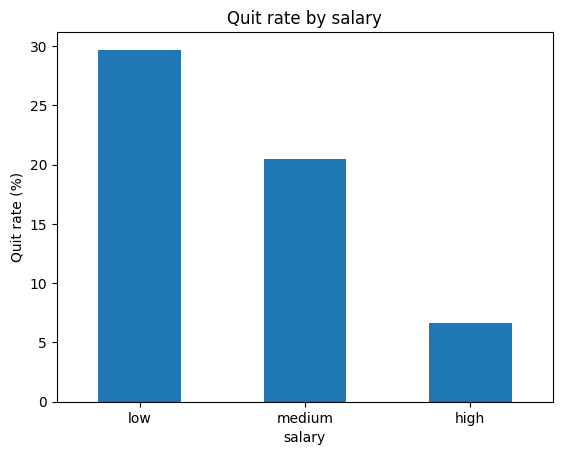

In [23]:
df.groupby('salary')['left'].mean().mul(100).reindex(['low','medium','high']).plot(kind='bar')
plt.ylabel('Quit rate (%)'); plt.title('Quit rate by salary'); plt.xticks(rotation=0); plt.show()

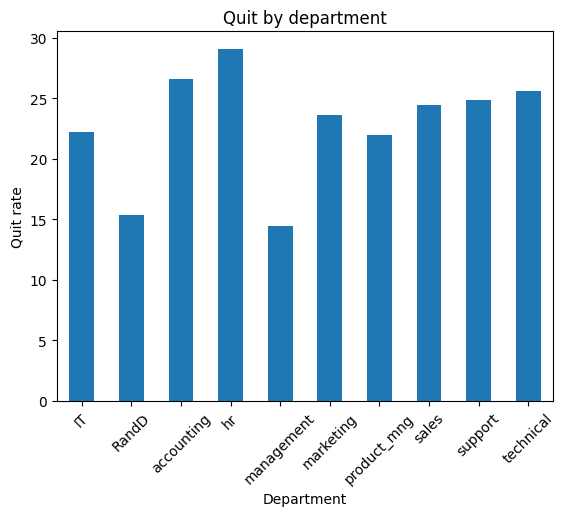

In [18]:
df.groupby('Department')['left'].mean().mul(100).plot(kind='bar')
plt.ylabel('Quit rate')
plt.title('Quit by department')
plt.xticks(rotation=45)
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle = df
dfle.salary=le.fit_transform(dfle.salary)
dfle.Department=le.fit_transform(dfle.Department)
dfle.sample(n=10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
4944,0.91,0.53,3,273,6,0,0,0,4,1
12454,0.09,0.97,7,254,4,1,1,0,1,2
10903,0.80,0.62,5,190,4,1,0,0,0,2
5679,0.21,0.53,3,229,5,0,0,0,2,2
7819,0.67,0.96,4,207,3,0,0,0,9,2
446,0.44,0.46,2,143,3,0,1,0,0,1
2300,0.51,0.41,6,106,5,0,0,0,7,2
5327,0.65,0.52,4,266,3,1,0,0,0,2
3487,0.14,0.46,2,267,6,1,0,0,8,1
12725,0.43,0.46,2,149,3,0,1,0,9,2


In [33]:
X=dfle[['satisfaction_level','number_project','salary']]
Y=dfle.left
X

,satisfaction_level,number_project,salary
0,0.38,2,1
1,0.80,5,2
2,0.11,7,2
3,0.72,5,1
4,0.37,2,1
...,...,...,...
14994,0.40,2,1
14995,0.37,2,1
14996,0.37,2,1
14997,0.11,6,1


In [43]:
from sklearn.preprocessing import OneHotEncoder
X=dfle[['satisfaction_level','number_project','salary']].values
ohe=OneHotEncoder(handle_unknown='ignore' , sparse_output=False)
X=np.hstack([ohe.fit_transform(X[:,[2]]), X[:,0:2]])
X

array([[0.  , 1.  , 0.  , 0.38, 2.  ],
       [0.  , 0.  , 1.  , 0.8 , 5.  ],
       [0.  , 0.  , 1.  , 0.11, 7.  ],
       ...,
       [0.  , 1.  , 0.  , 0.37, 2.  ],
       [0.  , 1.  , 0.  , 0.11, 6.  ],
       [0.  , 1.  , 0.  , 0.37, 2.  ]])

In [44]:
X=X[:,1:]
X

array([[1.  , 0.  , 0.38, 2.  ],
       [0.  , 1.  , 0.8 , 5.  ],
       [0.  , 1.  , 0.11, 7.  ],
       ...,
       [1.  , 0.  , 0.37, 2.  ],
       [1.  , 0.  , 0.11, 6.  ],
       [1.  , 0.  , 0.37, 2.  ]])

In [45]:
dfle.shape


(14999, 10)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [47]:
len(x_train)

11999

In [48]:
len(x_test)

3000

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
model.score(x_test,y_test)

0.7833333333333333